Уравнение прямой: y = 0.47470x + -3.60511
Slope: 0.47470 ± 0.00638
Свободный параметр: -3.60511


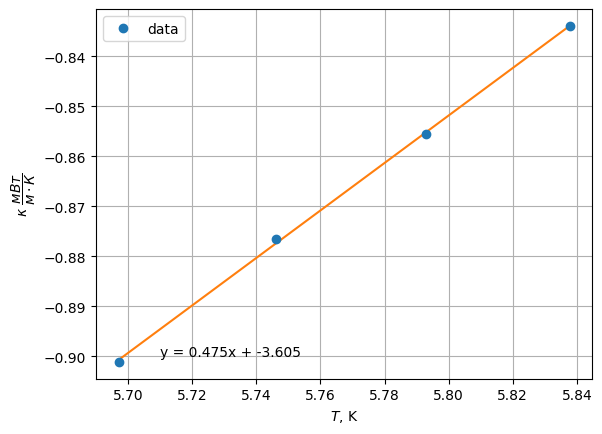

In [3]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# данные

my_data = genfromtxt('ln.csv', delimiter=',')

first, second, xerr, yerr = [], [], [], []
for element in my_data:
    first.append(element[0])
    second.append(element[1])

# del first[0]
# del second[0]
# del xerr[0]
# del yerr[0]

x = np.array(first)
y = np.array(second)


# метод наименьших квадратов
p, V = np.polyfit(x, y, 1, cov=True)
y_fit = np.polyval(p, x)

# построение графика
plt.errorbar(x, y, fmt='o', label='data')
plt.plot(x, y_fit)


# вывод коэффициента наклона с погрешностью
slope = p[0]
slope_error = np.sqrt(V[0][0])
# print('Slope: {:.5f} ± {:.5f}'.format(slope, slope_error))

ymean = np.mean(y)
xmean = np.mean(x)
b = ymean - slope * xmean
print('Уравнение прямой: y = {:.5f}x + {:.5f}'.format(slope, b))
slopeerror = np.sqrt(V[0][0])
print('Slope: {:.5f} ± {:.5f}'.format(slope, slopeerror))
print('Свободный параметр: {:.5f}'.format(b))

# название графика 
#plt.title('$R(T)$')

plt.text(5.71, -0.9, 'y = {:.3f}x + {:.3f}'.format(slope, b))

# название горизонтальной оси 
plt.xlabel('$T$, K')

# название вертикальной оси
plt.ylabel('$\kappa$ $\dfrac{мВт}{м \cdot К}$')

plt.grid()

plt.legend()
plt.show()
